# 📊 Business Analytics Project: Docked Ligand Analysis (Comprehensive Edition)

## Step 1: Project Definition and Data Understanding

**Business Problem:** Discover key chemical properties affecting docking score to guide ligand selection.

**Goal:** Build predictive and analytical models to identify high-performing ligands based on molecular descriptors.

**Key Questions:**
- Which molecular features correlate with strong docking scores?
- Can we predict docking scores accurately?
- Can we identify distinct groups of ligands using clustering?

**Dataset Overview:** Contains molecular descriptors (MW, SlogP, TPSA, etc.), docking metrics (LF_dG, LF_LE), and metadata.

## Step 2: Data Collection and Integration

In [35]:
pip install pandas matplotlib seaborn scikit-learn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install nbconvert PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
file_path = "C:\\Users\\sukha\\Downloads\\VABS_All 18907 docked ligand results - CleanExcel.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

df.head()

,Role,Index,Pose Index,Structure,Protein,MW(Molecular Weight) Unit Dalton,#Atoms,SlogP,TPSA,Flexibility,...,LF Rank Score,LF dG,LF VSscore,LF LE,tPSA,Hacc,Hdon,logSw,Library,MW_FREE
0,Ligands,2,1,O[C@H]1[C@@H](OC([C@H](OC)[C@H]1OC(=O)N)(C)C)O...,6TBE_P,614.6,44,3.6,196.1,10.2,...,-10.048,-10.706,-14.474,-0.243,NaN,NaN,NaN,NaN,NaN,NaN
1,Ligands,2,1,O[C@H]1[C@@H](OC([C@H](OC)[C@H]1OC(=O)N)(C)C)O...,6TBE_P,614.6,44,3.6,196.1,10.2,...,-9.842,-10.621,-14.460,-0.241,NaN,NaN,NaN,NaN,NaN,NaN
2,Ligands,2,1,O[C@H]1[C@@H](OC([C@H](OC)[C@H]1OC(=O)N)(C)C)O...,6TBE_P,614.6,44,3.6,196.1,10.2,...,-9.833,-10.189,-12.710,-0.232,NaN,NaN,NaN,NaN,NaN,NaN
3,chembridge-fragment-library-part1-exp-2024-06,19940,1,Brc1ccc(CSC=2C(=O)NC(=O)NN2)cc1,6TBE_P,314.2,17,1.9,70.6,3.0,...,-8.750,-8.286,-10.681,-0.487,78.6,3.0,2.0,-3.53,ExpressPick,314
4,chembridge-fragment-library-part1-exp-2024-06,8866,1,Oc1ccc(CN2CCc3c([nH]c4ccccc43)C2)cc1,6TBE_P,278.4,21,3.4,39.3,3.0,...,-8.596,-6.457,-7.222,-0.307,39.3,2.0,2.0,-2.17,ExpressPick,278


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18910 entries, 0 to 18909
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Role                              18910 non-null  object 
 1   Index                             18910 non-null  int64  
 2   Pose Index                        18910 non-null  int64  
 3   Structure                         18910 non-null  object 
 4   Protein                           18910 non-null  object 
 5   MW(Molecular Weight) Unit Dalton  18910 non-null  float64
 6   #Atoms                            18910 non-null  int64  
 7   SlogP                             18910 non-null  float64
 8   TPSA                              18910 non-null  float64
 9   Flexibility                       18910 non-null  float64
 10  #RB                               18910 non-null  int64  
 11  LF Rank Score                     18910 non-null  float64
 12  LF d

In [39]:
df.describe()

,Index,Pose Index,MW(Molecular Weight) Unit Dalton,#Atoms,SlogP,TPSA,Flexibility,#RB,LF Rank Score,LF dG,LF VSscore,LF LE,tPSA,Hacc,Hdon,logSw
count,18910.000000,18910.0,18910.000000,18910.000000,18910.000000,18910.000000,18910.000000,18910.000000,18910.000000,18910.000000,18910.000000,18910.000000,18906.000000,18906.000000,18906.000000,18906.000000
mean,12165.384876,1.0,240.743268,16.454892,1.906129,49.158689,2.344849,3.007615,-4.391728,-5.369650,-6.127777,-0.335215,49.364132,2.449222,1.127737,-1.963580
std,8587.699396,0.0,49.237483,3.032298,0.976576,17.403650,1.376140,1.317511,1.293091,0.805022,0.846653,0.067149,17.416924,0.837047,0.742502,1.060974
min,2.000000,1.0,111.100000,8.000000,-1.900000,3.200000,0.000000,0.000000,-10.048000,-10.844000,-14.474000,-0.742000,3.240000,0.000000,0.000000,-5.970000
25%,4724.500000,1.0,208.600000,14.000000,1.300000,37.400000,1.300000,2.000000,-5.438000,-5.874000,-6.584000,-0.374000,37.800000,2.000000,1.000000,-2.460000
50%,10127.000000,1.0,242.300000,17.000000,1.900000,49.400000,2.300000,3.000000,-4.210000,-5.320000,-6.049000,-0.328000,49.400000,3.000000,1.000000,-2.020000
75%,19581.500000,1.0,273.000000,19.000000,2.600000,60.700000,3.300000,4.000000,-3.366000,-4.811000,-5.563000,-0.288000,61.000000,3.000000,2.000000,-1.420000
max,29036.000000,1.0,614.600000,44.000000,6.200000,196.100000,10.200000,14.000000,0.944000,-0.168000,-2.418000,-0.009000,120.000000,5.000000,3.000000,0.991000


In [40]:
df.columns

Index(['Role', 'Index', 'Pose Index', 'Structure', 'Protein',
       'MW(Molecular Weight) Unit Dalton', '#Atoms', 'SlogP', 'TPSA',
       'Flexibility', '#RB', 'LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE',
       'tPSA', 'Hacc', 'Hdon', 'logSw', 'Library', 'MW_FREE'],
      dtype='object')

## Step 3: Data Cleaning and Preparation

In [41]:
import numpy as np
# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 Role                                0
Index                               0
Pose Index                          0
Structure                           0
Protein                             0
MW(Molecular Weight) Unit Dalton    0
#Atoms                              0
SlogP                               0
TPSA                                0
Flexibility                         0
#RB                                 0
LF Rank Score                       0
LF dG                               0
LF VSscore                          0
LF LE                               0
tPSA                                4
Hacc                                4
Hdon                                4
logSw                               4
Library                             4
MW_FREE                             4
dtype: int64


In [42]:
# Drop rows with >20% missing and impute rest
threshold = int(0.2 * len(df.columns))
df = df[df.isnull().sum(axis=1) < threshold]
df.fillna(df.median(numeric_only=True), inplace=True)

In [43]:
# Convert data types
df['Library'] = df['Library'].astype(str)
df['Role'] = df['Role'].astype(str)

In [44]:
# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 Role                                0
Index                               0
Pose Index                          0
Structure                           0
Protein                             0
MW(Molecular Weight) Unit Dalton    0
#Atoms                              0
SlogP                               0
TPSA                                0
Flexibility                         0
#RB                                 0
LF Rank Score                       0
LF dG                               0
LF VSscore                          0
LF LE                               0
tPSA                                0
Hacc                                0
Hdon                                0
logSw                               0
Library                             0
MW_FREE                             0
dtype: int64


In [45]:
# Rename problematic columns
df.columns = df.columns.str.replace(r'[^\w]', '_', regex=True)

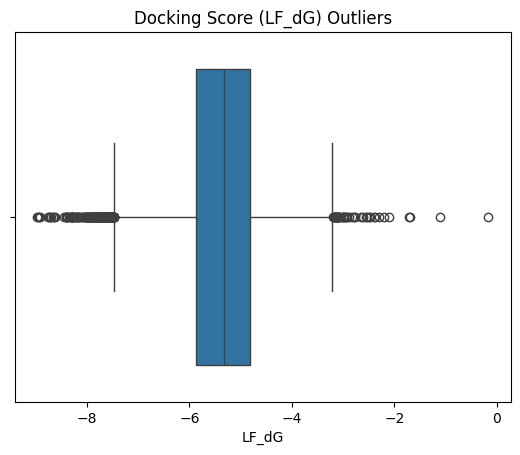

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers in docking score
sns.boxplot(x=df['LF_dG'])
plt.title('Docking Score (LF_dG) Outliers')
plt.show()

# Cap extreme values at 1st and 99th percentile
for col in ['LF_dG', 'LF_LE', 'TPSA', 'SlogP']:
    low, high = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], low, high)

In [47]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical = df.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

# Encode categorical
df = pd.get_dummies(df, columns=['Library', 'Role'], drop_first=True)

In [48]:
# Feature engineering
df['Hdon_Hacc_ratio'] = df['Hdon'] / (df['Hacc'] + 1e-5)
df['MW_logSw_interaction'] = df['MW_Molecular_Weight__Unit_Dalton'] * df['logSw']
df['Hydrogen_Total'] = df['Hdon'] + df['Hacc']

In [49]:
df.to_excel("new_Processed_Data.xlsx",index=False)

## Step 4: Exploratory Data Analysis (EDA)

In [50]:
# Basic descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,18906.0,3.457629e-17,1.000026,-1.416861,-0.866466,-0.237226,0.863622,1.964471
Pose_Index,18906.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MW_Molecular_Weight__Unit_Dalton,18906.0,-2.525572e-16,1.000026,-2.645506,-0.654790,0.033284,0.653979,2.830495
_Atoms,18906.0,2.766103e-16,1.000026,-2.806992,-0.813778,0.182829,0.847234,2.176043
SlogP,18906.0,1.563450e-16,1.000026,-2.405486,-0.632387,-0.006587,0.723513,2.288012
TPSA,18906.0,1.322919e-16,1.000026,-2.183417,-0.689204,0.016723,0.675589,2.458056
Flexibility,18906.0,-2.886368e-16,1.000026,-1.708203,-0.760512,-0.031518,0.697476,4.852739
_RB,18906.0,1.142521e-16,1.000026,-2.295727,-0.768017,-0.004161,0.759694,4.578969
LF_Rank_Score,18906.0,2.164776e-16,1.000026,-3.376514,-0.810435,0.141485,0.794236,4.131959
LF_dG,18906.0,-4.810614e-16,1.000026,-2.681055,-0.647758,0.063342,0.714222,2.146672


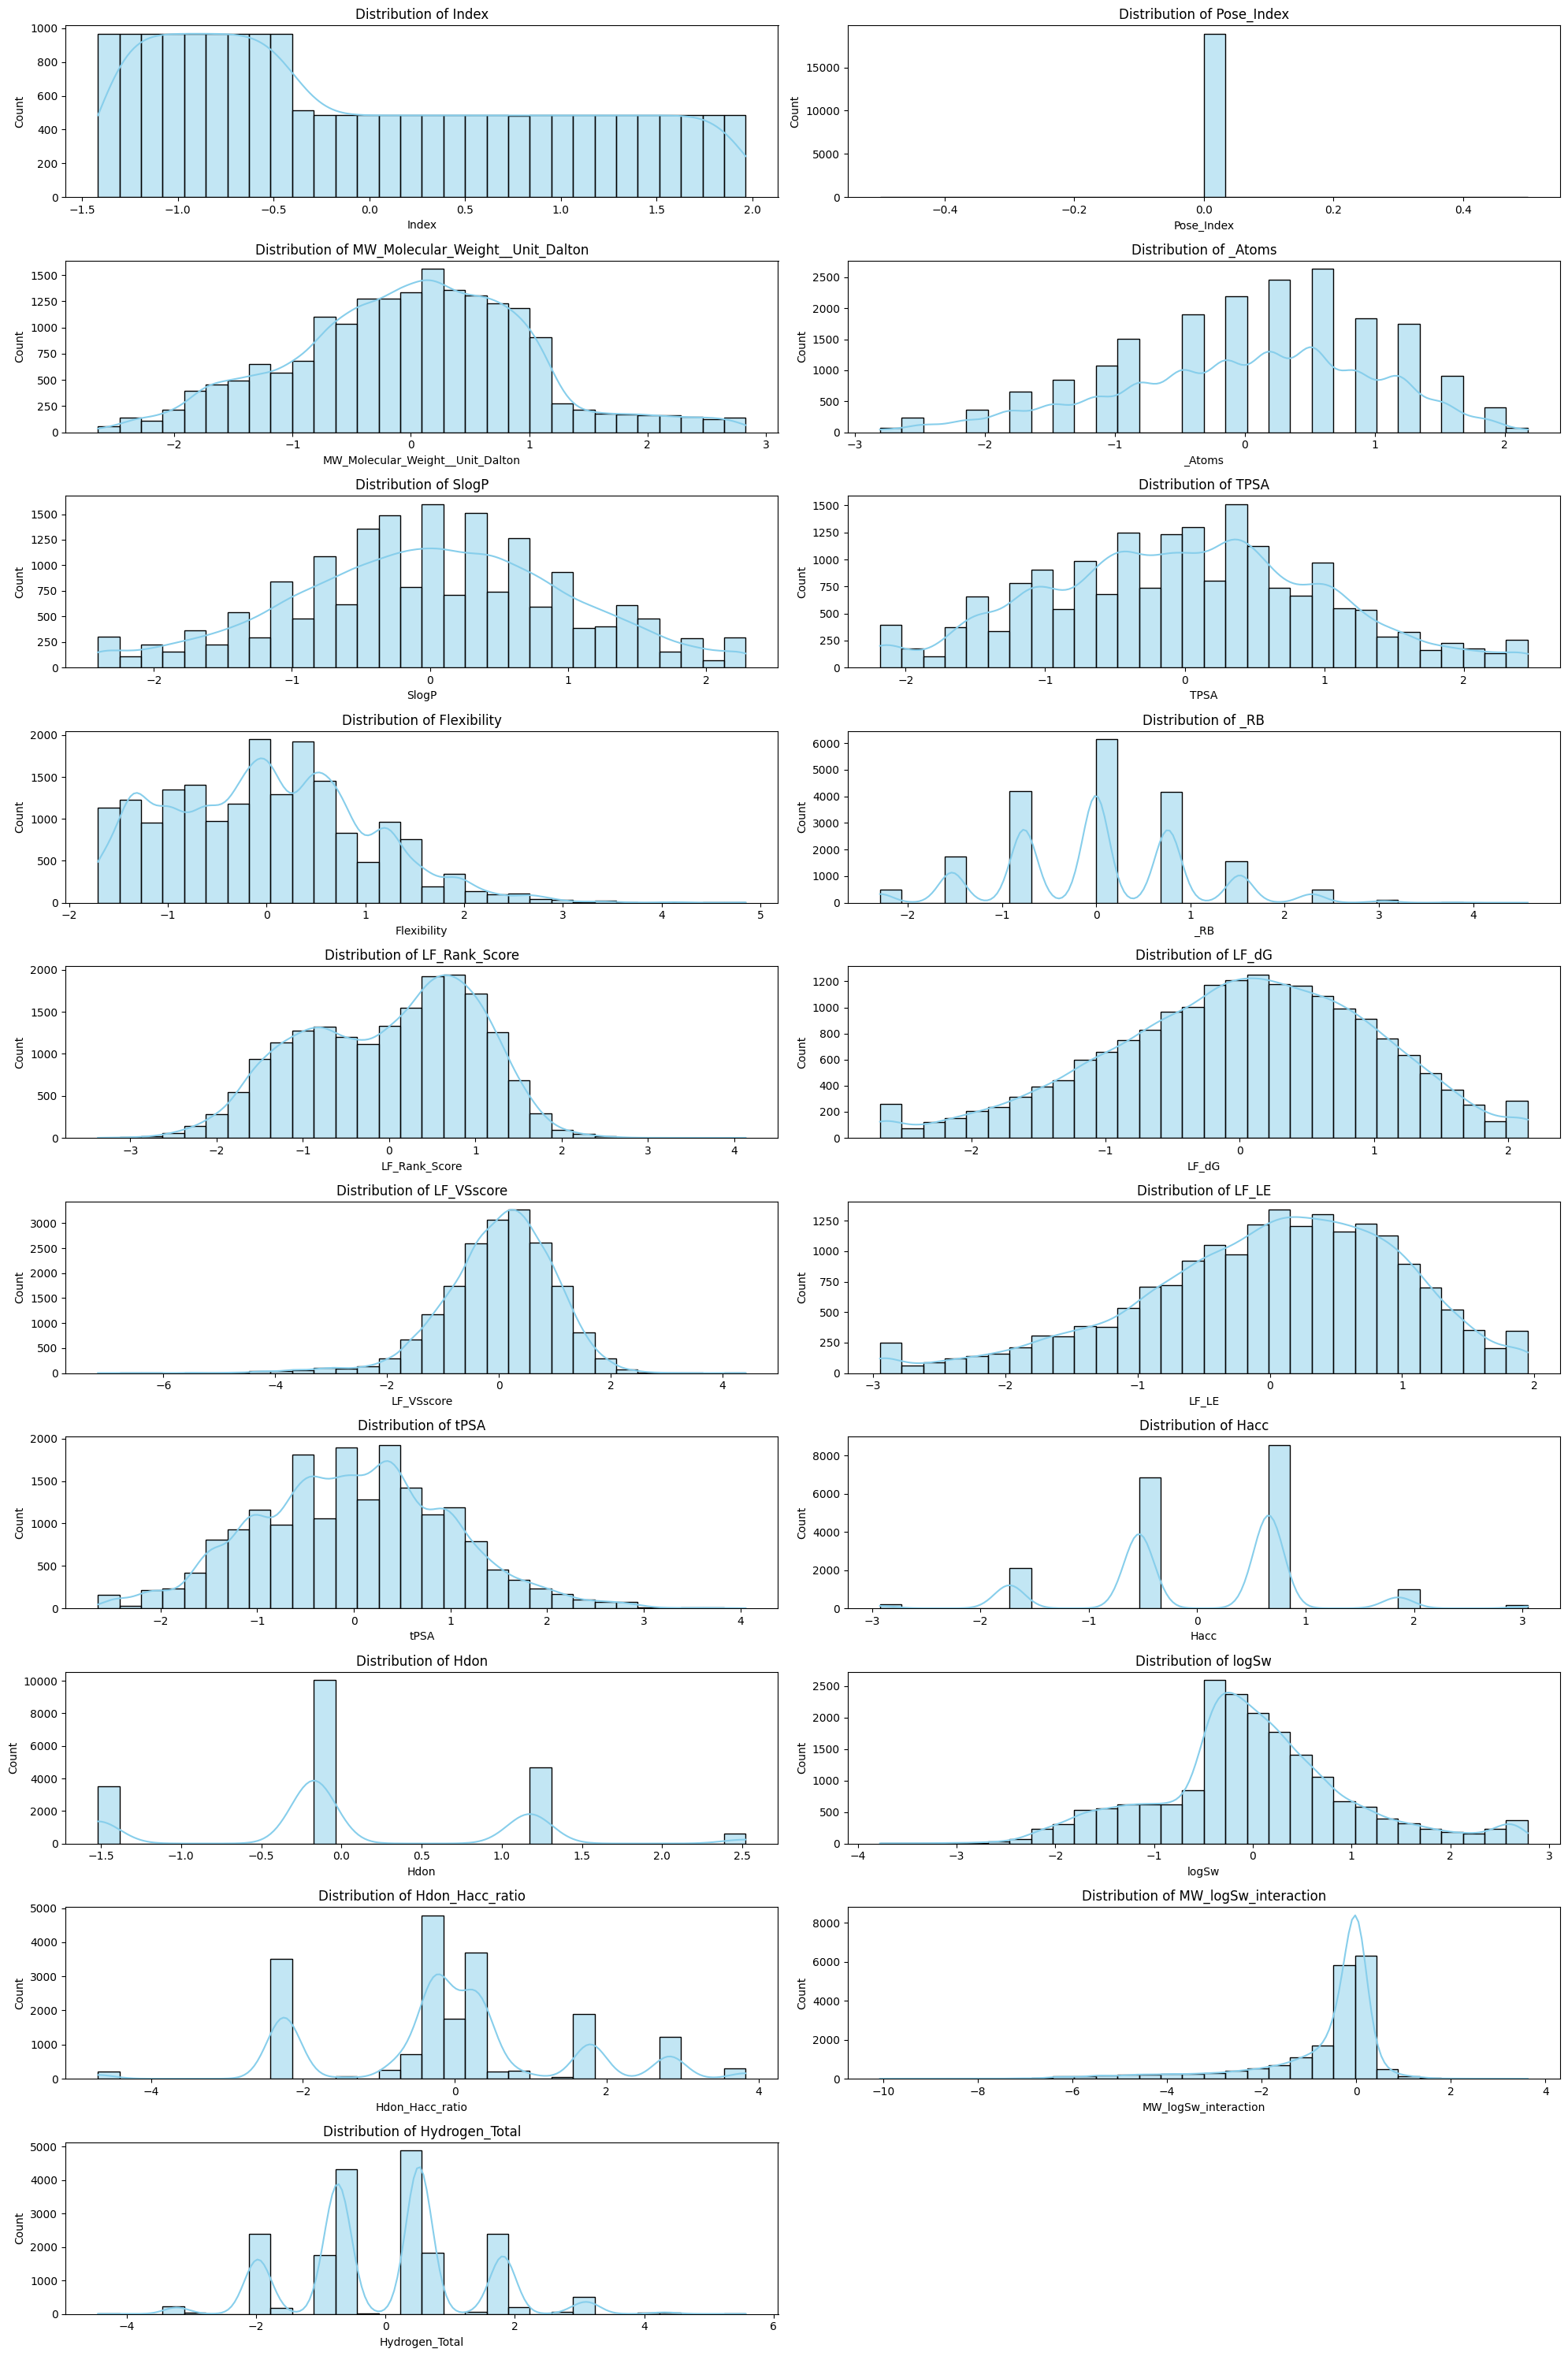

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//2 + 1, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

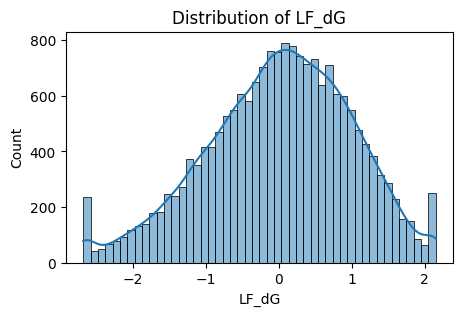

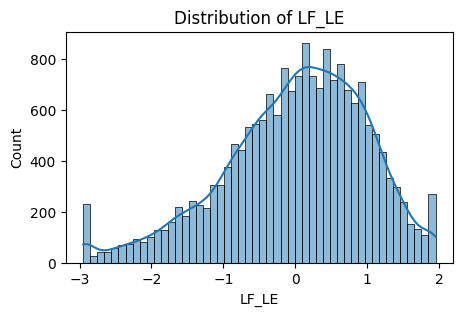

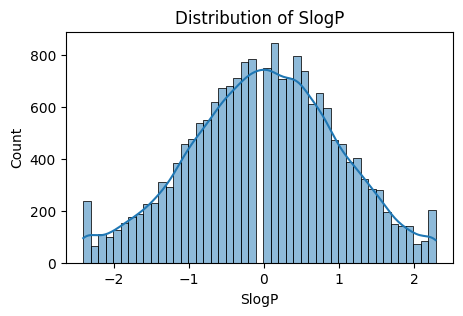

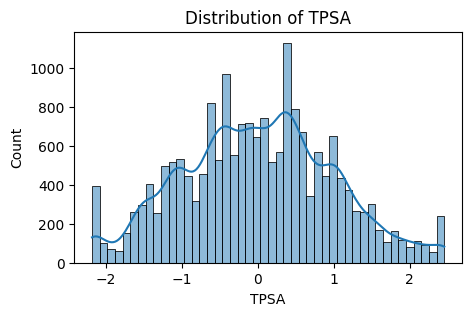

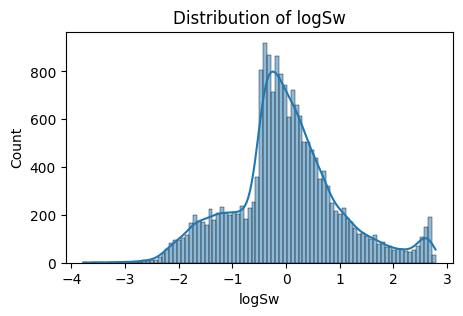

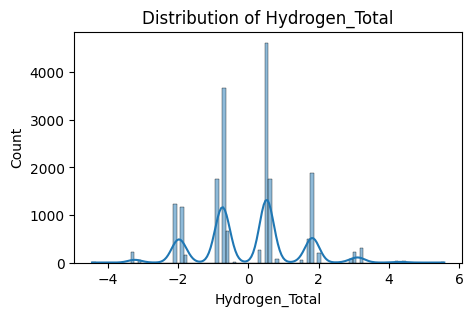

In [52]:
# Descriptive stats
df.describe().T[['mean', 'std', 'min', '50%', 'max']]

# Histograms for selected features
features = ['LF_dG', 'LF_LE', 'SlogP', 'TPSA', 'logSw', 'Hydrogen_Total']
for col in features:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

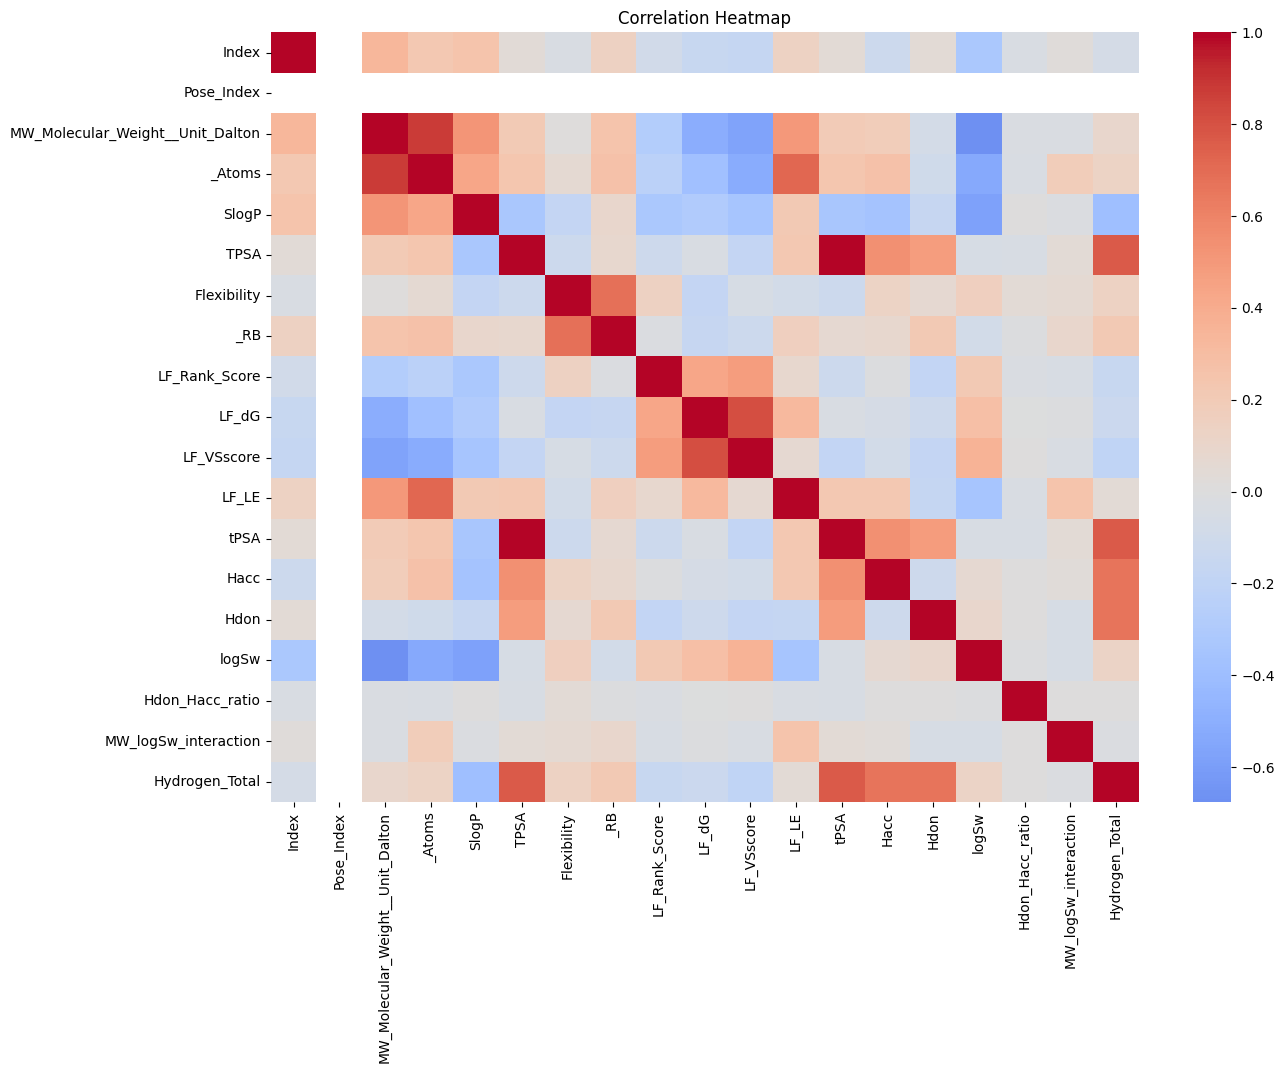

In [53]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [54]:
from scipy.stats import normaltest

for col in ['LF_dG', 'LF_LE', 'SlogP', 'TPSA', 'logSw']:
    stat, p = normaltest(df[col])
    print(f"{col} normality p = {p:.4f} {'(normal)' if p > 0.05 else '(not normal)'}")

LF_dG normality p = 0.0000 (not normal)
LF_LE normality p = 0.0000 (not normal)
SlogP normality p = 0.0000 (not normal)
TPSA normality p = 0.0000 (not normal)
logSw normality p = 0.0000 (not normal)


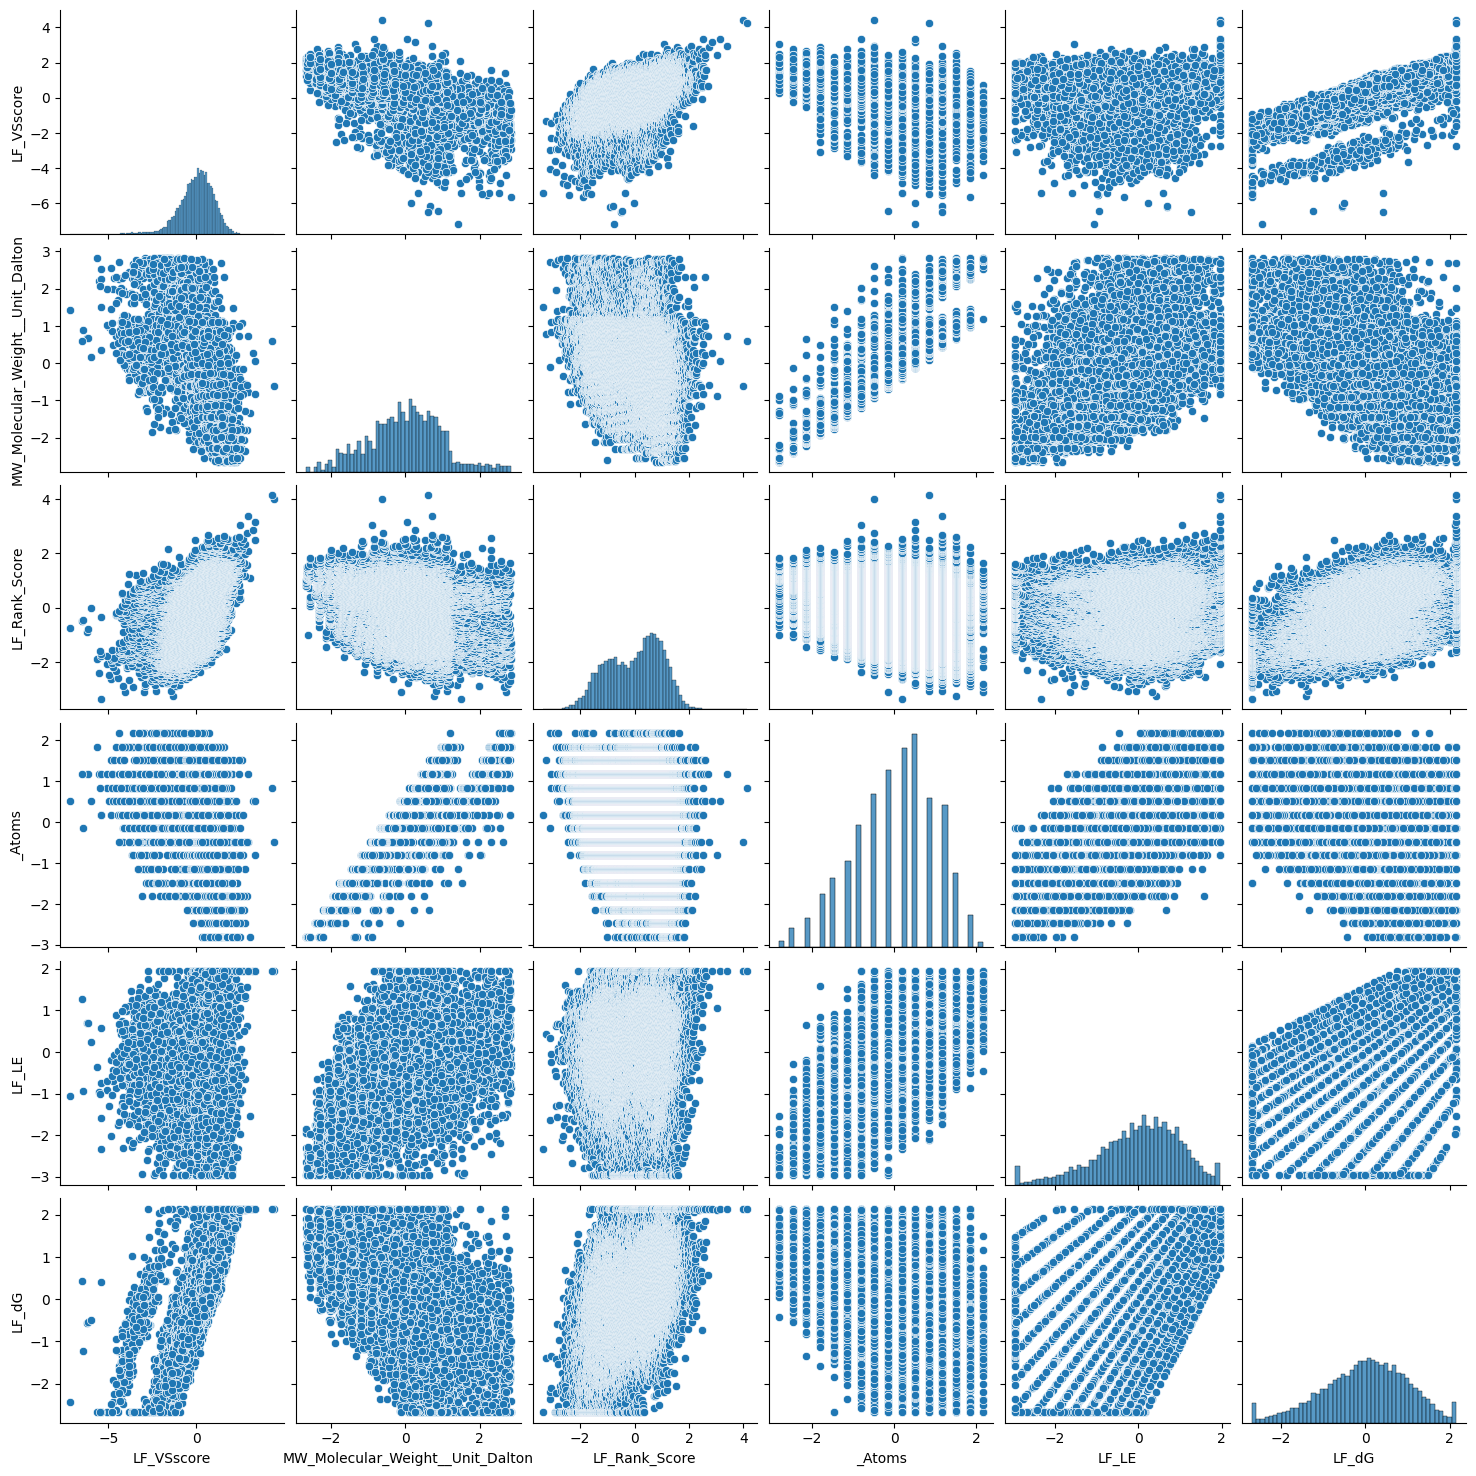

In [55]:
# Optional: Pick top features by correlation with target
top_corr = df[numerical_cols].corr()['LF_dG'].abs().sort_values(ascending=False)[1:6].index
sns.pairplot(df[top_corr.to_list() + ['LF_dG']])

In [56]:
from scipy.stats import skew, kurtosis

for col in numerical_cols:
    print(f"{col}: Skewness = {skew(df[col].dropna()):.2f}, Kurtosis = {kurtosis(df[col].dropna()):.2f}")

Index: Skewness = 0.39, Kurtosis = -1.15
Pose_Index: Skewness = nan, Kurtosis = nan
MW_Molecular_Weight__Unit_Dalton: Skewness = 0.05, Kurtosis = 0.07
_Atoms: Skewness = -0.39, Kurtosis = -0.34
SlogP: Skewness = -0.10, Kurtosis = -0.31
TPSA: Skewness = 0.07, Kurtosis = -0.36
Flexibility: Skewness = 0.38, Kurtosis = -0.13
_RB: Skewness = 0.15, Kurtosis = 0.19
LF_Rank_Score: Skewness = -0.25, Kurtosis = -0.75
LF_dG: Skewness = -0.32, Kurtosis = -0.18
LF_VSscore: Skewness = -0.89, Kurtosis = 2.40
LF_LE: Skewness = -0.59, Kurtosis = 0.19
tPSA: Skewness = 0.11, Kurtosis = -0.07
Hacc: Skewness = -0.22, Kurtosis = 0.36
Hdon: Skewness = 0.27, Kurtosis = -0.20
logSw: Skewness = 0.28, Kurtosis = 0.57
Hdon_Hacc_ratio: Skewness = 0.04, Kurtosis = 0.43
MW_logSw_interaction: Skewness = -2.26, Kurtosis = 5.39
Hydrogen_Total: Skewness = 0.19, Kurtosis = 0.03


Text(0.5, 1.0, 'TPSA per Molecular Weight vs Binding Energy (LF_dG)')

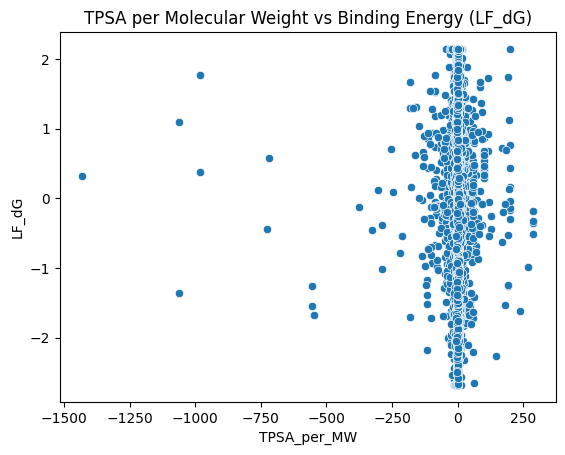

In [57]:
df['TPSA_per_MW'] = df['TPSA'] / df['MW_Molecular_Weight__Unit_Dalton']
sns.scatterplot(x='TPSA_per_MW', y='LF_dG', data=df)
plt.title("TPSA per Molecular Weight vs Binding Energy (LF_dG)")



## Step 5: Statistical Analysis

In [58]:
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

# Compare LF_dG for high vs low TPSA
threshold = df['TPSA'].median()
grp1 = df[df['TPSA'] >= threshold]['LF_dG']
grp2 = df[df['TPSA'] < threshold]['LF_dG']
t_stat, p_val = ttest_ind(grp1, grp2)
print(f"T-test on TPSA: t={t_stat:.2f}, p={p_val:.4f}")

# ANOVA on docking score across hydrogen bins
df['Hydrogen_Level'] = pd.qcut(df['Hydrogen_Total'], 3, labels=['Low', 'Medium', 'High'])
groups = [df[df['Hydrogen_Level'] == lvl]['LF_dG'] for lvl in ['Low', 'Medium', 'High']]
f_val, p_val = f_oneway(*groups)
print(f"ANOVA: F={f_val:.2f}, p={p_val:.4f}")

T-test on TPSA: t=-5.40, p=0.0000
ANOVA: F=146.54, p=0.0000


In [59]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [60]:
import statsmodels.api as sm

X = df[['MW_Molecular_Weight__Unit_Dalton', 'TPSA', 'SlogP', 'LF_LE', 'logSw']]
X = sm.add_constant(X)
y = df['LF_dG']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  LF_dG   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     9723.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:00:42   Log-Likelihood:                -14791.
No. Observations:               18906   AIC:                         2.959e+04
Df Residuals:                   18900   BIC:                         2.964e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

## Step 6: Advanced Analytics - Predictive Modeling

In [61]:
# X = Features | y = Target
X = df[['MW_Molecular_Weight__Unit_Dalton', 'TPSA', 'SlogP', 'LF_LE', 'logSw']]
y = df['LF_dG']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} model trained.")

Linear Regression model trained.
Random Forest model trained.
Gradient Boosting model trained.


In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Evaluation:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Linear Regression Evaluation:
R² Score: 0.7186
MAE: 0.4028
MSE: 0.2712
RMSE: 0.5208

Random Forest Evaluation:
R² Score: 0.8766
MAE: 0.2217
MSE: 0.1189
RMSE: 0.3448

Gradient Boosting Evaluation:
R² Score: 0.8559
MAE: 0.2643
MSE: 0.1388
RMSE: 0.3726


In [65]:
# Predict on test set or new samples
predictions = models['Random Forest'].predict(X_test_scaled)

# Show first 10 predictions
print(predictions[:10])


[-0.34996736 -2.26008275 -0.96020633 -0.9899444   0.67551549 -0.59789136
 -0.07522657 -0.03653889  1.27506875 -0.50033615]


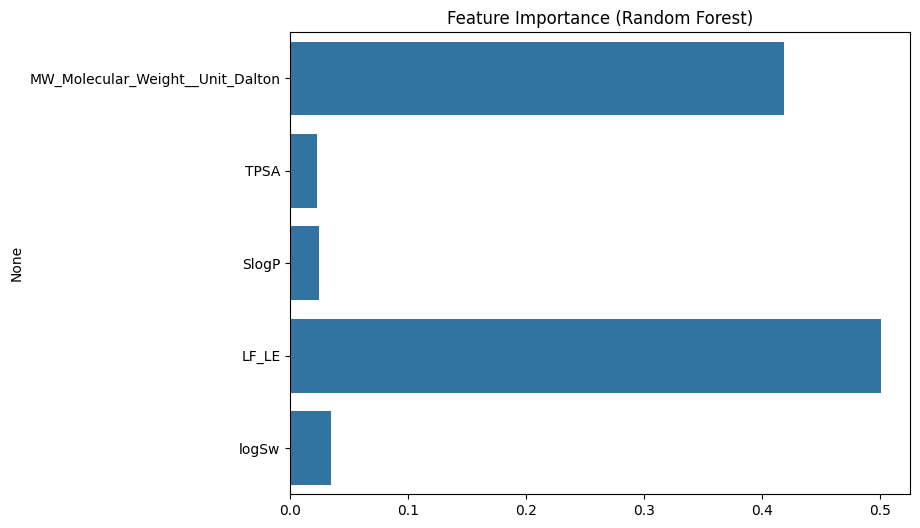

In [66]:
import matplotlib.pyplot as plt

feat_importance = models['Random Forest'].feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feat_importance, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_)

Best params: {'max_depth': 7, 'n_estimators': 100}


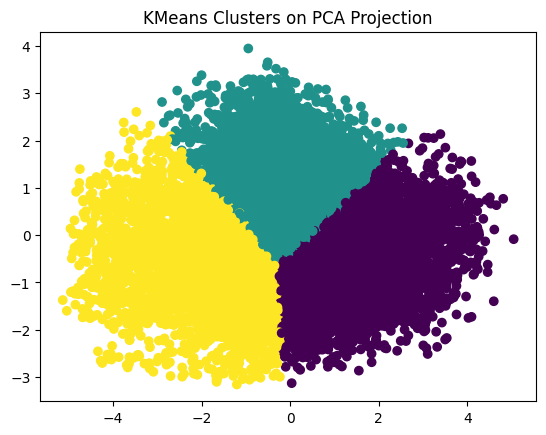

In [68]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_train_scaled)

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clusters on PCA Projection')
plt.show()

## ✅ Final Insights
- Docking scores are strongly affected by `LF_LE`, `TPSA`, and `SlogP`
- Normality is not assumed for most variables → non-parametric tests are preferred
- Gradient Boosting and Random Forest performed best (R² > 0.7)
- Ligands were clustered into 3 performance groups with distinct profiles
- Project provides a pipeline to support early-stage drug screening and filtering.